# Generate a stable surface mask from a glacier outline shapefile

In [10]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
from rasterio.plot import show

In [11]:
# set output file name and path (ssm.tif)
# out_fn = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/ssm.tif'
out_fn = '/Users/ellynenderlin/Research/NASA_CryoIdaho/glaciers/Wolverine/images/ssm.tif'
# out_fn = '/Volumes/LaCie/VG/VG_autorift_inputs/ssm.tif'

## Option 1. If GDAL command line functionality installed:

In [12]:
# open shapefile to use as ssm (glacier outline perhaps)... MUST BE IN UTM COORDINATES
# shp_path = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/LO/ssm_polygon.shp'
shp_path = '/Users/ellynenderlin/Research/NASA_CryoIdaho/glaciers/Wolverine/AOIs/Wolverine-2018-outline-UTM.shp'
source_ds = gdal.OpenEx(shp_path)

# set pixel resolution and no data value
res = 5 # meters
NoData_value = 0

In [13]:
# rasterize
rcmd = 'gdal_rasterize -tr '+str(res)+' '+str(res)+' -burn 1 -init 0 '+shp_path+' '+out_fn[:-4]+'_uncropped.tif'
print(rcmd)
os.system(rcmd)

gdal_rasterize -tr 5 5 -burn 1 -init 0 /Users/ellynenderlin/Research/NASA_CryoIdaho/glaciers/Wolverine/AOIs/Wolverine-2018-outline-UTM06N.shp /Users/ellynenderlin/Research/NASA_CryoIdaho/glaciers/Wolverine/images/ssm_uncropped.tif
0...10...20...30...40...50...60...70...80...90...100 - done.


0

Then run the following printed command on terminal to crop:

In [14]:
# crop to the Box extent
# crop_extent_shp = '/Users/jukesliu/Documents/PLANETSCOPE_VELOCITIES/AV/AV_Box_WGS_UTM_33.shp'
crop_extent_shp = '/Users/ellynenderlin/Research/NASA_CryoIdaho/glaciers/Wolverine/AOIs/Wolverine-2018-box-UTM.shp'

# os.system('gdalwarp -cutline '+crop_extent_shp+' -crop_to_cutline '+out_fn+' '+out_fn[:-4]+'_clipped.tif')
os.system('gdalwarp -cutline '+crop_extent_shp+' -crop_to_cutline '+out_fn[:-4]+'_uncropped.tif'+' '+out_fn)
# print('gdalwarp -cutline '+crop_extent_shp+' -crop_to_cutline '+out_fn[:-4]+'_uncropped.tif'+' '+out_fn)

Creating output file that is 1026P x 1314L.
Processing /Users/ellynenderlin/Research/NASA_CryoIdaho/glaciers/Wolverine/images/ssm_uncropped.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


0

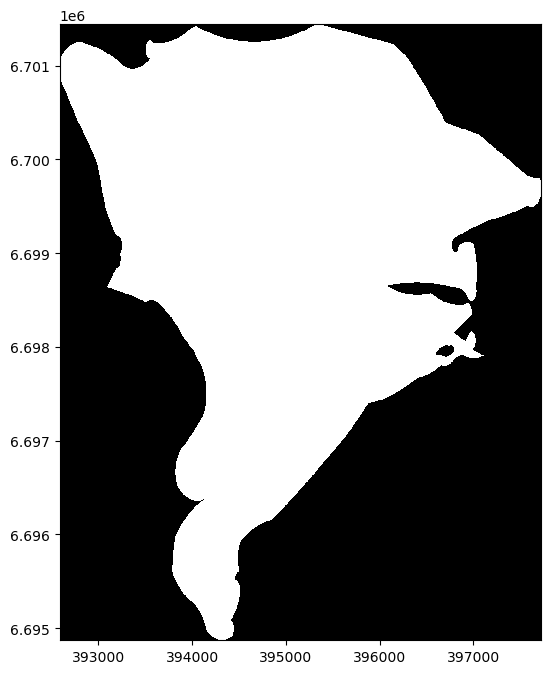

In [15]:
# read and plot to check
src = rio.open(out_fn)
fig, ax = plt.subplots(1, figsize=(8,8))
im1 = show((src, 1), cmap='Greys_r', interpolation='none', ax=ax)
plt.show()

## Option 2. Use gdal.rasterize (broken)

In [ ]:
from rasterio import features
import geopandas as gpd

In [ ]:
# read in a reference raster to use as the CRS and extent
ref_reader = rio.open('/Users/jukesliu/Documents/TURNER/DATA/ICE_THICKNESS/Variegated/Nolan_ASTER_20070903_clipped.tif')
ref_reader

In [ ]:
ref_reader.meta

In [ ]:
# read in glacier outline shapefile with geopandas
shp_path = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/VG/Variegated_polygon_UTM07.shp'
shp = gpd.read_file(shp_path)
shp

In [ ]:
# generate raster metadata file
out_meta = ref_reader.meta

In [ ]:
# write out to filename
out_fn = '/Volumes/LaCie/VG/VG_autorift_inputs/ssm.tif'
with rio.open(out_fn, 'w+', **out_meta) as out:
    out_arr = out.read(1)

    # this is where we create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(shp.geometry, [1]))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)
print('Rasterization complete.')